<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/assignments/M1_AST_05_VectorCalculus_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: Vector Calculus

## Learning Objectives

At the end of the experiment, you will be able to:

* solve differential equations analytically using SymPy

* understand the basic rules of partial differentiation

* perform the differentiation on multi variable functions and visualize them

## Information

Key Points

* A vector field in the plane, for instance, can be visualized as a collection of arrows with a given magnitude and direction each attached to a point in the plane.
* Vector fields can be constructed out of scalar fields using the gradient operator.
* Vector fields can be thought to represent the velocity of a moving flow in space, and this physical intuition leads to notions such as the divergence (the rate of change of volume of a flow) and curl (the rotation of a flow).

In vector calculus, a vector field is an assignment of a vector to each point in a subset of Euclidean space.

The elements of differential and integral calculus extend to vector fields in a natural way. When a vector field represents force, the line integral of a vector field represents the work done by a force moving along a path, and, under this interpretation, conservation of energy is exhibited as a special case of the fundamental theorem of calculus. Vector fields can be thought to represent the velocity of a moving flow in space, and this physical intuition leads to notions such as the divergence (the rate of change of volume of a flow) and curl (the rotation of a flow).

![vector field](https://cdn.iisc.talentsprint.com/CDS/vector_field.JPG)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2301978" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9844001418" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
TSid = Id
ipython = get_ipython()

notebook= "M1_AST_05_VectorCalculus_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [5]:
import numpy as np
from sympy import *
import sympy
import matplotlib.pyplot as plt
from sympy.abc import x, y,z
import math
init_printing() # tells SymPy to start printing output with LaTeX

To know more about **sympy** click [here](https://docs.sympy.org/latest/index.html)

### Creating symbols with sympy and applying differentiation

We can make a function with SymPy in multiple ways

#### 1. Undefined functions

In [6]:
# Multiple ways to assign symbolic variables / undefined functions
x = Symbol('x')
x = symbols('x')
y = symbols('y', cls=Function)(x)

In [7]:
y

y(x)

In [8]:
f = Function('f')
f

f

In [9]:
g = Function('g')(x)
g

g(x)

In [10]:
f(x).diff(x)

d       
──(f(x))
dx      

#### 2. Defined functions

With most commonly defined functions you can pass symbolic variables, single numeric values, as well as entire numpy arrays into them.

Let's define a function and feed numeric values through it.

In [11]:
def f(x):
    return x**2 + 1
f(Symbol('x'))

 2    
x  + 1

In [12]:
f(2)

5

In [13]:
# single-variable functions can be applied to numpy arrays
f(np.array([2, 3]))

array([ 5, 10])

Now let us assign an expression to a variable and use f.subs() to
  - plug a value in for a given symbolic variable in the expression
  - pass a different variable into the function.

**Note:** Passing arrays does not work as intended.

To know more about **subs** click [here](https://docs.sympy.org/latest/tutorial/basic_operations.html)

In [14]:
f = x ** 2 + 1

# substituting 5 in f
f.subs(x, 5)

26

In [15]:
# substituting symbol t in f
f.subs(x, Symbol('t'))

 2    
t  + 1

#### Scalar and vector fields

A vector is an object that has both a magnitude and a direction. Geometrically, we can picture a vector as a directed line segment, whose length is the magnitude of the vector and with an arrow indicating the direction. The direction of the vector is from its tail to its head.
![Vector](https://cdn.iisc.talentsprint.com/CDS/vector.JPG)

To create the cartesian based vectors, corresponding to the X, Y and Z axes we use sympy.vector. These can be accessed using the properties named i, j and k respectively.

To know more about vector fields click [here](https://tutorial.math.lamar.edu/classes/calciii/VectorFields.aspx)

In [16]:
from sympy.vector import CoordSys3D

# coordinate system is initialized with R which has the orthonormal unit vectors (i^, j^ and k^)
R = CoordSys3D('R')
v = 3*R.i + 4*R.j + 5*R.k
v

(3) i_R + (4) j_R + (5) k_R

#### Gradient

Consider a scalar field f(x,y,z) in 3D space. The gradient of this field is defined as the vector of the 3 partial derivatives of f with respect to x, y and z in the X, Y and Z axes respectively.

To know more about gradient click [here](https://betterexplained.com/articles/vector-calculus-understanding-the-gradient/)

In [17]:
from sympy.vector import gradient

r_eq = R.x * R.y * R.z

#Returns the vector gradient of a scalar field computed wrt the base scalars of the given coordinate system
gradient(r_eq)

(y_R⋅z_R) i_R + (x_R⋅z_R) j_R + (x_R⋅y_R) k_R

### Position vector

A position vector is a continously changing vector in n-space. considering an expression $ sin(2t) - cos(2t) $ where value of $t$ ranging from 0 to 8, let's compute and visualize the plot.

In [18]:
t = symbols('t')

# Defining an expression
expr = sin (2 * t) - cos(2 * t)
expr

sin(2⋅t) - cos(2⋅t)

In [19]:
# substituting t with 2
expr.subs(t,2)

sin(4) - cos(4)

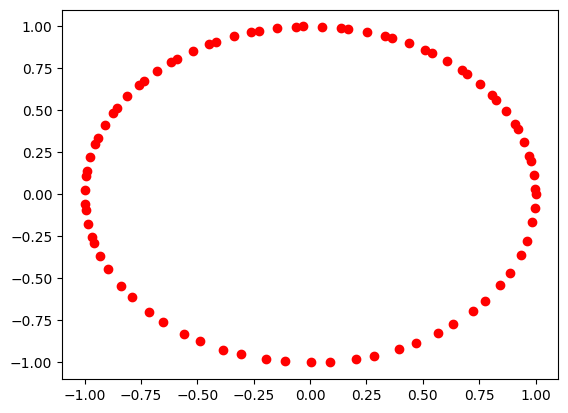

In [20]:
t1 = 0

# compute the expression with t value ranging from 0 to 8
while t1 < 8:
    # visualize the expression
    plt.plot(cos(2 * t1), sin(2 * t1), 'ro')
    t1 += 0.1
plt.show()

### Derivative of a polynomial equation

let us find the derivate of the equation $ x^3 - 5 x^2+10 x-10 $ using power rule

In [21]:
x = Symbol('x')
curr = x ** 3 - 5 * x ** 2 + 10 * x - 10 # Defining a polynomial equation
firstD = diff(curr) # finding first derivate of the equation
firstD

   2            
3⋅x  - 10⋅x + 10

- To know more about Derivate of polynomial equation click [here](http://web.mit.edu/wwmath/calculus/differentiation/polynomials.html#:~:text=We%20need%20to%20know%20the,any%20constant%20function%20is%20zero.)
- To know more about **lambdify** click [here](https://docs.sympy.org/latest/modules/utilities/lambdify.html)

In [22]:
lamFD = lambdify(x, firstD) # Lambdifying the equation
lamFD(1)

3

Now let us define a general function to perform $n^{th}$ order differentiation by passing the order of derivative and equation as parameters to the function.

For example, to find the $n^{th}$ order derivative of the natural logarithm function $y$ = ln $x$

We calculate several successive derivatives of the given function:

$ y'$ = (ln   $x$)' = $\frac{1}{x} $

$ y'' = (y')' =  (\frac{1}{x})' = -\frac{1}{x^2} $

$ y''" = (y'')' = (-\frac{1}{x^2})' = \frac{2}{x^3} $

the derivative of an orbitrary $n^{th}$ order is given by $ y^{(n)} = \frac{-(1)^{n-1}(n-1)!}{x^n}$

In [27]:
def derive(eq, iters):
    for i in list(range(iters)): # iterating over the equation to calculate the nth order derivative
        curr = diff(eq)  # finding derivate of the equation
        eq = curr
    return eq

g = derive(derive(curr,2),2)
h = lambdify('x',g)
h(2)

0

#### Application of chain rule

The chain rule states that the derivative of $f(g(x))$ is $f'(g(x))⋅g'(x)$ . if $f$ and $g$ are both differentiable and $F(x)$ is the composite function defined by $F(x) = f(g(x))$ then $F$ is differentiable and F' is given by the product.

$F'(x) = f'(g(x)) . g'(x) $

$f'(g(x))$ is the Differentiate outer function

$g'(x)$ is the Differentiate inner function

To know more about chain rule click [here](https://mathinsight.org/chain_rule_simple_examples)

In [28]:
fs = 2 * x + 1
gs = x ** 4
f = lambdify('x',fs)
g = lambdify('x',gs)
h = g(f(x))
hLam = lambdify('x',h)
h, hLam(1)

⎛         4    ⎞
⎝(2⋅x + 1) , 81⎠

Given a  $ f (x, y) =  e^{-x} sin y$, let's calculate the partial derivatives of the function f w.r.t x and y are

$ \frac{∂f (x, y)} { ∂x } = - e^{-x} sin y $

$ \frac{∂f(x, y)} {∂y}  = e^{-x} cos y $

To know more about quiver click [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

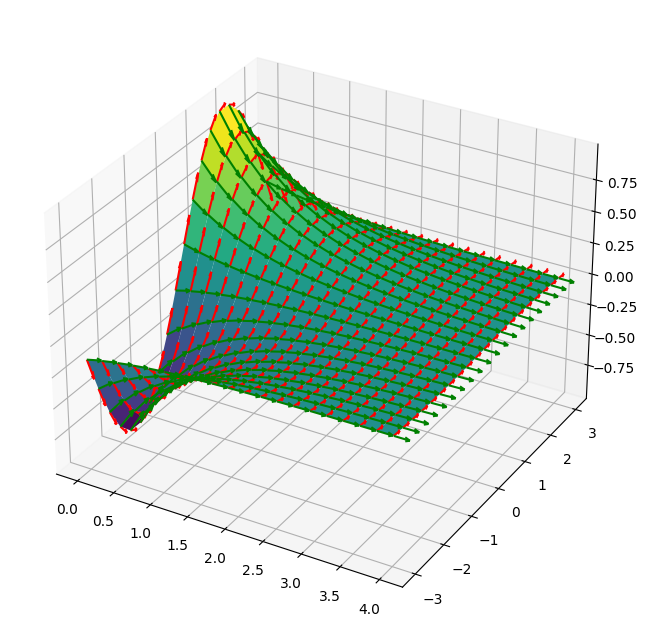

In [29]:
x, y = np.meshgrid(np.linspace(0, 4, 20), np.linspace(-3, 3, 20))
f = np.exp(-x) * np.sin(y) # Defining a function
dfdx = -np.exp(-x) * np.sin(y) # Derivate of function f w.r.t x
dfdy = np.exp(-x) * np.cos(y) # Derivate of function f w.r.t y
# 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f, cmap='viridis')
x0 = np.zeros_like(x)
x1 = np.ones_like(x)
ax.quiver(x, y, f, x1, x0, dfdx, color='g', length=0.2) # Plotting the derivates of function x w.r.t x
ax.quiver(x, y, f, x0, x1, dfdy, color='r', length=0.2) # Plotting the derivates of function x w.r.t y
plt.show()

### Second-order differential equations

Suppose, we have a second-order ODE such as a damped simple harmonic motion equation,

$ y′′+2y′+2y=cos(2x),y(0)=0,y′(0)=0 $

We can turn this into two first-order equations by defining a new depedent variable.

For example,
$ z≡y′⇒z′+2z+2y=cos(2x),z(0)=y(0)=0 $

To know more about second-order differential equation click [here](https://www.mathsisfun.com/calculus/differential-equations-second-order.html)

We can solve this system of ODEs using "odeint" with lists, as follows:

In [31]:
# Differential equations are solved in Python with the Scipy.integrate package using function ODEINT
from scipy.integrate import odeint

def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

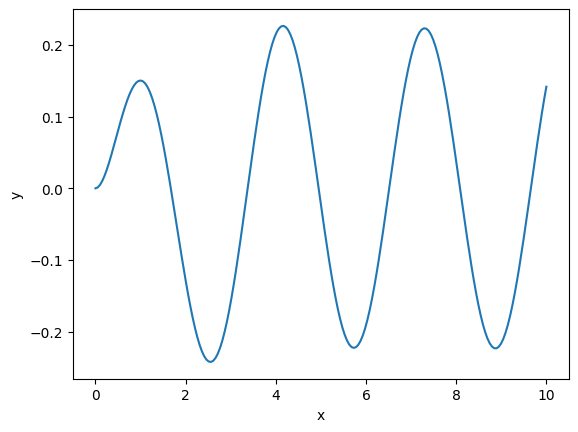

In [32]:
# Plot the solution

plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys)
plt.show()

### Hessian matrix

The Hessian is second order derivative of a function. If we differentiate a function 2 times we will get a Hessian matrix which tells us curvature of function. The eigenvalues of the Hessian represents the curvature of the loss function is in the direction of the corresponding eigenvector. Stronger curves mean a faster change in the gradient

For a function $ y = f(x_1, x_2,....,x_n)$, Hessian determinant is defined as:
$$
  \begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2}  & \dots  & \frac{\partial f}{\partial x_1 \partial x_n} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}  & \dots  & \frac{\partial^2 f}{\partial x_2 \partial x_n}  \\
    \vdots & \vdots &  & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2}  & \dots  & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix} = \begin{bmatrix}   f_{11} & f_{12} & \dots & f_{1n} \\
                  f_{21} & f_{22} & \dots &f_{2n} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  f_{n1} & f_{n2} & \dots & f_{nn}
\end{bmatrix}  
$$

Let us take an example with a function $ x^3+y^2+z $ now we will use sympy go get the Hessian matrix

To know more about Hessian Matrix click [here](https://mathworld.wolfram.com/Hessian.html)

To know more about pprint click [here](https://docs.python.org/3/library/pprint.html)

In [33]:
x ,y, z= symbols('x y z')
g2 = x**3 + y**2+z
pprint(hessian(g2, (x, y,z)))

⎡6⋅x  0  0⎤
⎢         ⎥
⎢ 0   2  0⎥
⎢         ⎥
⎣ 0   0  0⎦


Let us consider a function $f(x,y) = x^2 + y^2$ We can take a derivative of the changes in the function with respect to either x or y. We call these derivatives with respect to one variable partial derivatives. Let's give this a try by taking the derivative of $f(x,y)$ with respect to x. We write this partial derivative as follows.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Since $f(x,y)$ is the sum of several simpler functions we need to take the partial derivative of each of these and sum the result. The first two parts are easy. $\frac{\partial x^2}{\partial x} = 2x$
Notice that we are following the usual rules of differentiation for any function of x here.

Now we need to take the partial derivative of the last part of $f(x,y)$, which does not depend on x at all. In these case we get the following $\frac{\partial y^2}{\partial x} = 0$
Now we can add up the parts to get the complete partail derivative of $f(x,y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$
We can also take the partial derivative of $f(x,y)$ with respect to y. The process proceeds in the following manner $\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$

In [34]:
# Create a uniform grid
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

## flatten the grid to 1-d and compute the value of the function z
x_coord = []
y_coord = []
z = []
for i in range(11):
    for j in range(11):
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))
        z.append(nx[i,j]**2 + ny[i,j]**2)

In [35]:
# perform vector arithmetic to get the x and y gradients
x_grad = [2 * x for x in x_coord]
y_grad = [2 * y for y in y_coord]

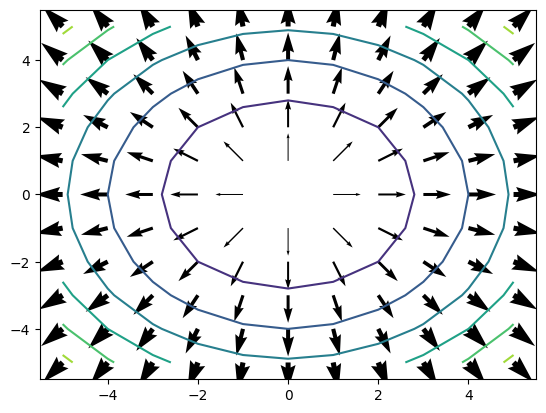

In [36]:
# Plot the arrows using  width for gradient
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: ## Avoid the zero divide when scaling the arrow
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

## Plot the countours of the function surface
z = np.array(z).reshape(11,11)
plt.contour(el, el, z)
plt.show()

### Jacobian Matrix

To test for functional dependence (both linear and non linear equations) between different equations we use Jacobian determinant shown by |j|. The Jacobian matrix is the first order derivatives of a vector valued function. Vector valued functions are defined as $f: \mathbb{R}^n \to \mathbb{R}^m$.

Given $x \in \mathbb{R}^n$ and $f_j : \mathbb{R}^n \to \mathbb{R}$ we have

$$f(x) = \begin{bmatrix}
    f_1(x) \\
    f_2(x) \\
    \vdots \\
    f_m(x)
\end{bmatrix}$$

 We could then define the jaccobian  as

 $$J(x) = \begin{bmatrix}
    \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2}  & \dots  & \frac{\partial f_1}{\partial x_n} \\
    \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}  & \dots  & \frac{\partial f_2}{\partial x_n}  \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2}  & \dots  & \frac{\partial f_m}{\partial x_n}
\end{bmatrix} $$

Hence each row represents the derivative of a real valued function with input vectors. Note that using shape convention we must reshape that to have the same output as the vector input.

Let's find the derviate of function $f(x, y) = x + sin(y) $ with respect to x and y

In [37]:
x, y = sympy.symbols("x, y") # declaring x and y as symbols
f = x + sympy.sin(y) # Defining the function f(x, y)
print(f)

x + sin(y)


In [38]:
fx = f.diff(x) # Derivate w.r.t to 'x'
fy = f.diff(y) # Derivate w.r.t to 'y'

If we organize these partials into a horizontal vector, we get the gradient of f(x,y), or $\Delta$ f(x,y):

$ \Delta f(x,y)  = [\frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y}] = [1, cos(y)] $

In [39]:
gradientfxy = [fx, fy]
print(gradientfxy)

[1, cos(y)]


Now let's find the derviate of function $g(x, y) = sin(x) + y $ with respect to x and y

In [40]:
g = sympy.sin(x) + y # Defining the function g(x, y)
print(g)

y + sin(x)


In [41]:
gx = g.diff(x) # Derivate w.r.t to 'x'
gy = g.diff(y) # Derivate w.r.t to 'y'

If we organize these partials into a horizontal vector, we get the gradient of g(x,y), or  Δ  g(x,y):

$ \Delta g(x,y)  = [\frac{\partial g(x,y)}{\partial x}, \frac{\partial g(x,y)}{\partial y}] = [cos(x), 1] $

In [42]:
gradientgxy = [gx, gy]
print(gradientgxy)

[cos(x), 1]


If we organize the gradients of *f(x, y) and g(x, y)* into a single matrix, we move from vector calculus into matrix calculus. This matrix, and organization of the gradients of multiple functions with multiple variables, is known as the Jacobian matrix.

$ J = \begin{bmatrix}
\Delta f(x,y) \\
\Delta g(x,y) \end{bmatrix} =\begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} & \frac{\partial f(x,y)}{\partial y}\\
\frac{\partial g(x,y)}{\partial x} & \frac{\partial g(x,y)}{\partial y}
\end{bmatrix} = \begin{bmatrix}
1 & cos(y) \\
cos(x) & 1
\end{bmatrix} $

To know more about the Jacobian Matrix read [here](https://towardsdatascience.com/step-by-step-the-math-behind-neural-networks-d002440227fb)

In [43]:
jacobianMatrix = sympy.Matrix([gradientfxy, gradientgxy])
print(jacobianMatrix)

Matrix([[1, cos(y)], [cos(x), 1]])


#### Gradients of Vector-Valued Functions

A vector valued function is one that has some amount of inputs, and the same amount of outputs as functions, whose evaluation represents a vector.


Let's find the parital derivate of a vector field $\vec V(x,y) = \bigg [\begin{matrix}  -2x + y \\ 2x + 3y \end{matrix} \bigg]$

In [44]:
# Creating a vector
X = np.linspace(-10, 10, 10)
Y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(X, Y)
X1 = -2 * X + Y
X2 = 2 * X + 3 * Y

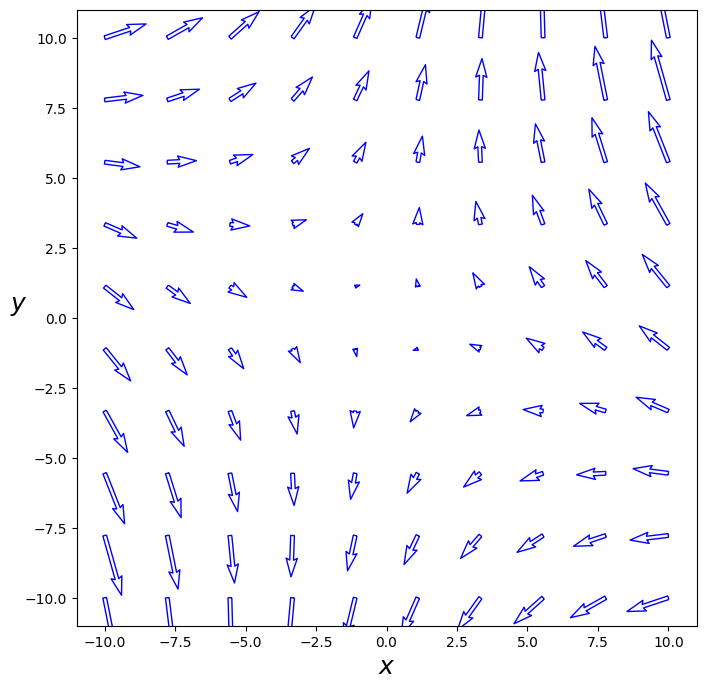

In [45]:
# Plotting the vector field for above vector
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=1, cmap='autumn')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Partial derivate of a vector *V* w.r.t x and y

In [46]:
x, y = sympy.symbols("x, y")
v = sympy.Matrix([[-2 * x + y], [2*x + 3*y]])
px, py = v.diff(x), v.diff(y) # Storing derivates w.r.t to x and y in px and py variables

px, py

⎛⎡-2⎤  ⎡1⎤⎞
⎜⎢  ⎥, ⎢ ⎥⎟
⎝⎣2 ⎦  ⎣3⎦⎠

Plotting the derivates

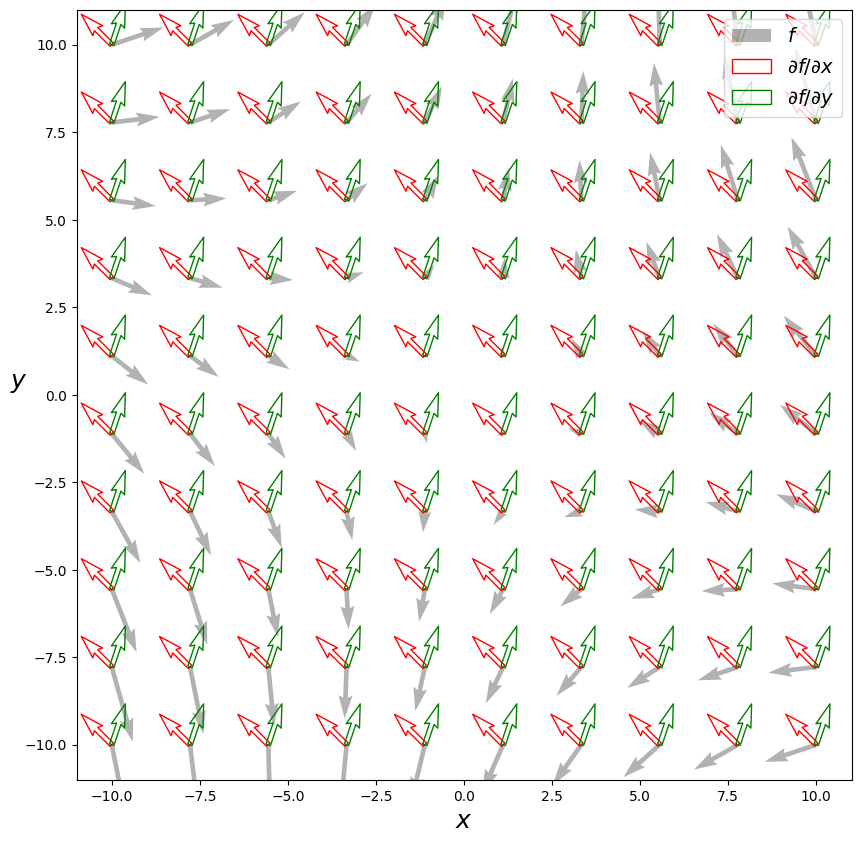

In [47]:
partial_x1 = -2
partial_x2 = 2
partial_y1 = 1
partial_y2 = 3

plt.figure(figsize=(10, 10))
plt.quiver(X, Y, X1, X2, linewidth=0.5, alpha=0.3, label="$f$") # Plotting Original vector
plt.quiver(X, Y, partial_x1, partial_x2, edgecolor='r', facecolor='None',
          linewidth=1, label="${\partial f}/{\partial x}$") # Derivate of vector v w.r.t x ad y
plt.quiver(X, Y, partial_y1, partial_y2, edgecolor='g', facecolor='None',
          linewidth=1, label="${\partial f}/{\partial y}$") # Derivate of vector v w.r.t x ad y
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(fontsize=14)
plt.show()

### Please answer the questions below to complete the experiment:




Given $ f(x, y, z) = x ^ 3 + 2xyz + y^2$ , which of the following represents $\nabla  f$?

a. $ \begin{bmatrix}
3x^2 + 2yz \\
2xz + 2y \\
2xy
\end{bmatrix} $

b. $ \begin{bmatrix}
3x^2 + 2xyz \\
3x^2 + 2xz + 2y \\
2xy
\end{bmatrix} $

c. $ \begin{bmatrix}
6x + 2yz \\
2 \\
2xy
\end{bmatrix}$

In [48]:
# @title Choose the correct representation above for the gradient of f(x, y, z) { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "a" #@param ["","a", "b", "c"]

In [49]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [50]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "No comments" #@param {type:"string"}


In [51]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [52]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [53]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [54]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
Id = TSid
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1635
Date of submission:  24 Jan 2024
Time of submission:  11:13:13
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
